In [421]:
from PIL import Image
import numpy as np
import cv2

In [422]:
img = cv2.imread("./data/exdark_coco/images/2015_00436.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# scale down a half
# img = img.resize((img.width // 2, img.height // 2))

In [423]:
def show_img(img):
    import matplotlib.pyplot as plt

    plt.imshow(img)
    plt.show()

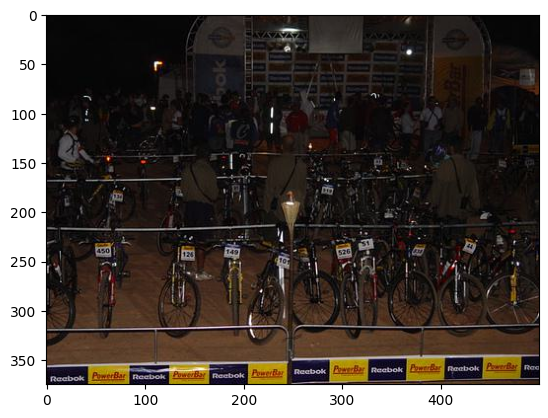

In [424]:
show_img(img)

In [425]:
# convert to numpy array
img = np.array(img)
img = img / 255.0

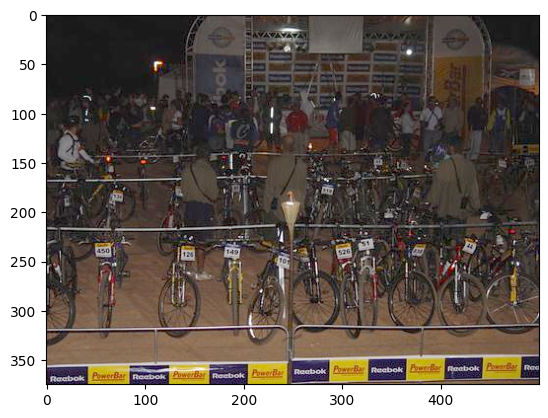

In [426]:
# gamma correction
show_img(img**0.6)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


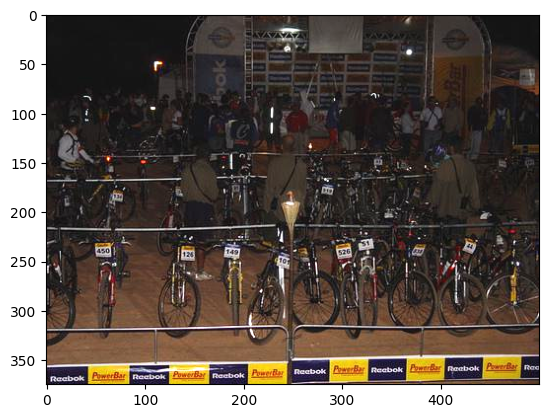

In [427]:
show_img(1.3 * img + 0.05)

In [428]:
def gaussian_blur(img):
    kernel = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16
    return cv2.filter2D(img, -1, kernel)

In [429]:
def sharpen(img, l):
    return img + l * (img - gaussian_blur(img))

In [430]:
def lum(img):
    return 0.2126 * img[:, :, 0] + 0.7152 * img[:, :, 1] + 0.0722 * img[:, :, 2]


def enlum(img):
    return 1 / 2 * (1 - np.cos(np.pi * lum(img)))


def en(img):
    factor = enlum(img) / lum(img)
    return img * factor[:, :, None]


def adjust_contrast(img, alpha):
    return alpha * en(img) + (1 - alpha) * img

/tmp/ipykernel_20301/2404548228.py:10: RuntimeWarning: invalid value encountered in divide
  factor = enlum(img) / lum(img)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/home/qninhdt/miniconda3/envs/mmyolo/lib/python3.8/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


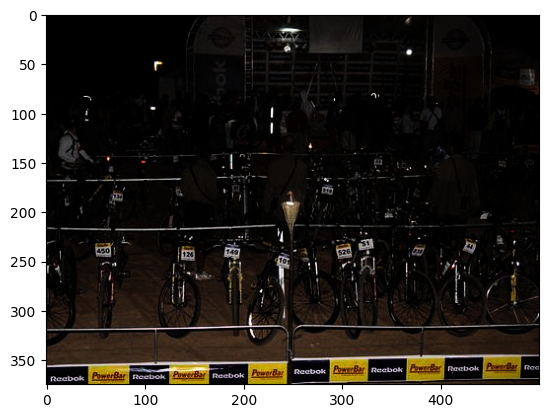

In [435]:
alpha = 0
show_img(en(img))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


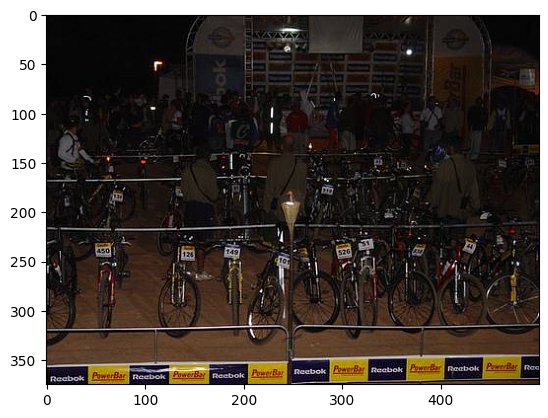

In [432]:
show_img(sharpen(img, 0.5))